In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk

In [4]:
#Increase output window size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
df = train.append(test, ignore_index = True, sort = True)
df

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [8]:
# remove @user handles
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [9]:
#Remove punctuation
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^A-Za-z#]"," ")

In [10]:
#Remove stopwords
from nltk.corpus import stopwords 
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
#Remove Stopwords
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords_list]))

In [12]:
#Remove Shortwords
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 2]))
df

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think #school #exa...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome #gr


In [13]:
#Tokenization
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: x.split())
df.head()

## from nltk import word_tokenize --We can also use nltk library for tokenization
## df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: word_tokenize(x))

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,"[thanks, #lyft, credit, use, cause, offer, whe..."
2,3,0.0,bihday your majesty,"[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,"[#model, love, take, time]"
4,5,0.0,factsguide: society now #motivation,"[factsguide, society, #motivation]"


In [14]:
#Stemming
from nltk.stem.porter import PorterStemmer
stemming = PorterStemmer()
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([stemming.stem(i) for i in x])) 
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [15]:
from wordcloud import wordcloud

In [16]:
Joinwords = ' '.join( i for i in df['tidy_tweet'])

In [17]:
from wordcloud import WordCloud

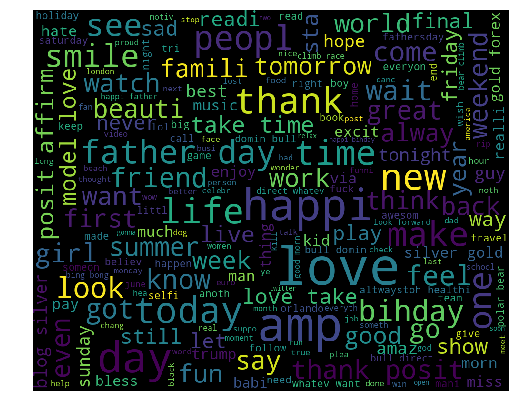

In [18]:
##Most repeated words used
wordcloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 110).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

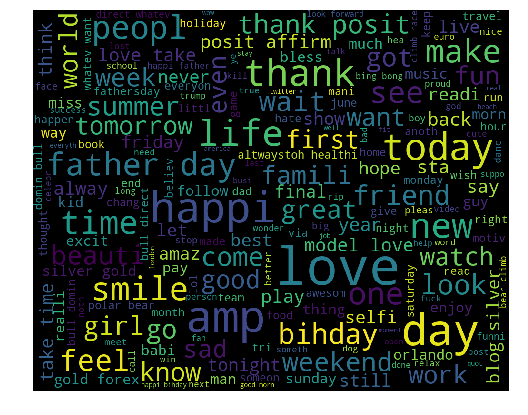

In [19]:
#Most Positive repeated words
Joinwords = ' '.join( [i for i in df.loc[df.label == 0.0,'tidy_tweet']])

wordcloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 110).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

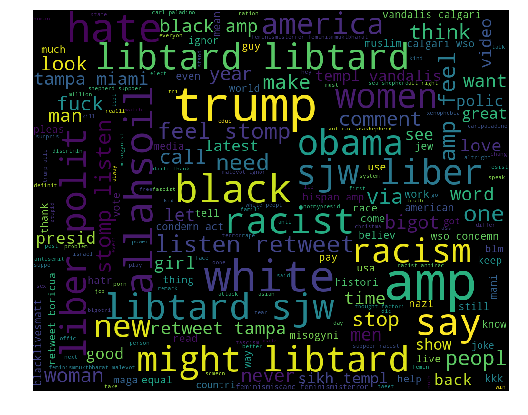

In [20]:
#Most Negative repeated words
Joinwords = ' '.join( [i for i in df.loc[df.label == 1.0,'tidy_tweet']])
wordcloud = WordCloud(width = 1000, height = 800, random_state = 21, max_font_size = 110).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
def hashtag_words(input):
    hashtag = []
    for i in input:
        word = re.findall(r"#(\w+)", i)
        hashtag.append(word)
    return hashtag

In [22]:
Hash_normal = hashtag_words(df.loc[df['label'] == 0.0, 'tidy_tweet'])
Hash_negative = hashtag_words(df.loc[df['label'] == 1.0, 'tidy_tweet'])

In [23]:
HT_normal = sum(Hash_normal,[])
HT_negative = sum(Hash_negative,[])

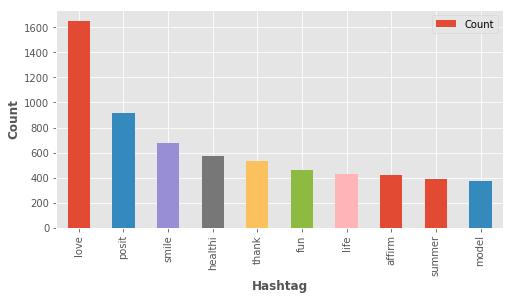

In [24]:
#Create a Dataframe: 
a = nltk.FreqDist(HT_normal)
data_normal = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}).sort_values(by = ['Count'], ascending = False)
data_normal = data_normal.head(10)
data_normal
#Plot Graph
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["figure.figsize"] = [8, 4]
data_normal.plot(kind = 'bar',x = 'Hashtag', y = 'Count')
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

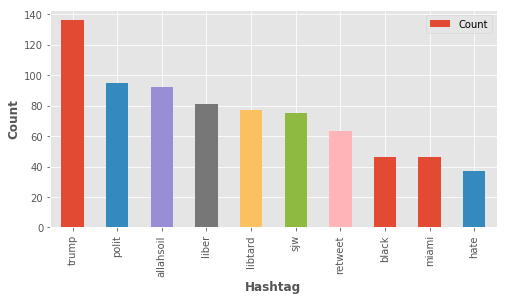

In [25]:
#Create a Dataframe: 
b = nltk.FreqDist(HT_negative)
data_negative = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())}).sort_values(by = ['Count'], ascending = False)
data_negative = data_negative.head(10)
data_negative
#Plot Graph
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["figure.figsize"] = [8, 4]
data_negative.plot(kind = 'bar',x = 'Hashtag', y = 'Count')
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Feature Selection

In [26]:
#Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(analyzer='word',max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['tidy_tweet'])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [27]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tf_idf = tf_idf_vectorizer.fit_transform(df['tidy_tweet'])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_tf_idf = tf_idf[:31962,:]
test_tf_idf = tf_idf[31962:,:]

# Model Building

In [28]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_valid, y_train, y_valid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lg = LogisticRegression()
lg.fit(X_train,y_train)
prediction = lg.predict_proba(X_valid)
prediction = prediction[:,1] >= 0.3  #0.3 means correctly predicting 30% of data
f1_score(y_valid, prediction)

0.5620377978635991

In [30]:
test_pred = lg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [31]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_valid, y_train, y_valid = train_test_split(train_tf_idf, train['label'], random_state=42, test_size=0.3)
lg = LogisticRegression()
lg.fit(X_train,y_train)
prediction = lg.predict_proba(X_valid)
prediction = prediction[:,1] >= 0.3
f1_score(y_valid, prediction)

0.5424321959755031